In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import time
from datetime import datetime
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from dateutil import parser

from PIL import Image
from io import BytesIO
sns.set_style()
from matplotlib.offsetbox import  OffsetImage, AnnotationBbox

In [2]:
twitter_data_csv = "/Users/ZGS/Documents/Data_Bootcamp/Project-Twitter/Resources/Twitter_Data.csv"
df = pd.read_csv(twitter_data_csv)
df.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,statuses_count,user_created_at,verified,user_name,description,followers_count,listed,favorites_count,notifications,following
0,0,NaN,NaN,Sat Jul 07 17:31:21 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,47785.0,Fri Apr 17 15:45:33 +0000 2009,False,frances renfer 1959,I am a retired middle school art teacher - Tau...,350.0,NaN,15153.0,False,False
1,1,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,2680.0,Fri Dec 01 15:53:47 +0000 2017,False,wicked smaht patriot,Quietly watching. Sending love .++++++++,539.0,NaN,17028.0,False,False
2,2,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,8921.0,Mon Apr 23 21:54:10 +0000 2018,False,Never Dem Again,#Trump2020...#KAG...#NoTrollZone #blocked...Ob...,1802.0,NaN,4787.0,False,False
3,3,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,804.0,Wed Feb 25 17:47:05 +0000 2015,False,Sam Tennant,así es la vida—UNC ‘22,327.0,NaN,14826.0,False,False
4,4,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,111944.0,Mon Oct 17 20:17:41 +0000 2016,False,and justice for all,"Pillar of Patience, G-MA, Forever Yankee Fan, ...",677.0,NaN,121203.0,False,False


In [3]:
top_names = ['realDonaldTrump',
 'BTS_twt',
 'England',
 'FoxNews',
 'YouTube',
 'narendramodi',
 'FIFAWorldCup',
 'HarryMaguire93',
 'msdhoni',
 'SeaveyDaniel']

In [4]:
avg_by_source=df.groupby("top_user")["comp"].mean()
avg_by_source

top_user
BTS_twt            0.141166
England            0.259368
FIFAWorldCup       0.206215
FoxNews           -0.069758
HarryMaguire93     0.150803
SeaveyDaniel       0.302205
YouTube            0.060363
msdhoni            0.603918
narendramodi       0.081166
realDonaldTrump   -0.074072
Name: comp, dtype: float64

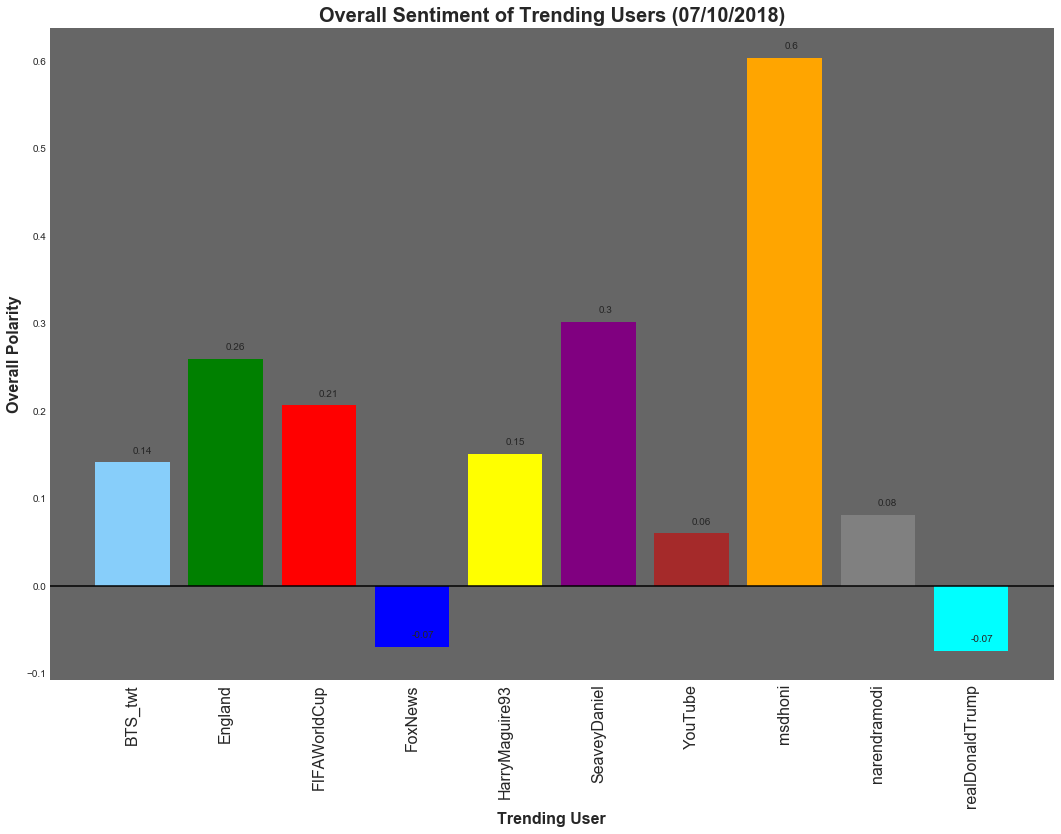

In [51]:
x_axis = np.arange(len(avg_by_source))
xlabels = avg_by_source.index
count = 0
for sentiment in avg_by_source:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1

plt.bar(x_axis, avg_by_source,
        tick_label = xlabels,
        align='center',
        color = ['lightskyblue', 'green', 'red', 'blue', 'yellow', 'purple','brown','orange','gray','aqua'])
plt.gcf().set_size_inches(18, 12)
plt.grid()
plt.axhline(0, color='k')
plt.title("Overall Sentiment of Trending Users (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold',fontsize=20)
plt.xlabel("Trending User", fontweight='bold', fontsize=16)
plt.ylabel("Overall Polarity", fontweight='bold', fontsize=16)
plt.xticks(rotation='vertical', fontsize = 16)
plt.savefig("Overall Sentiment Trending Users.png")
plt.show()

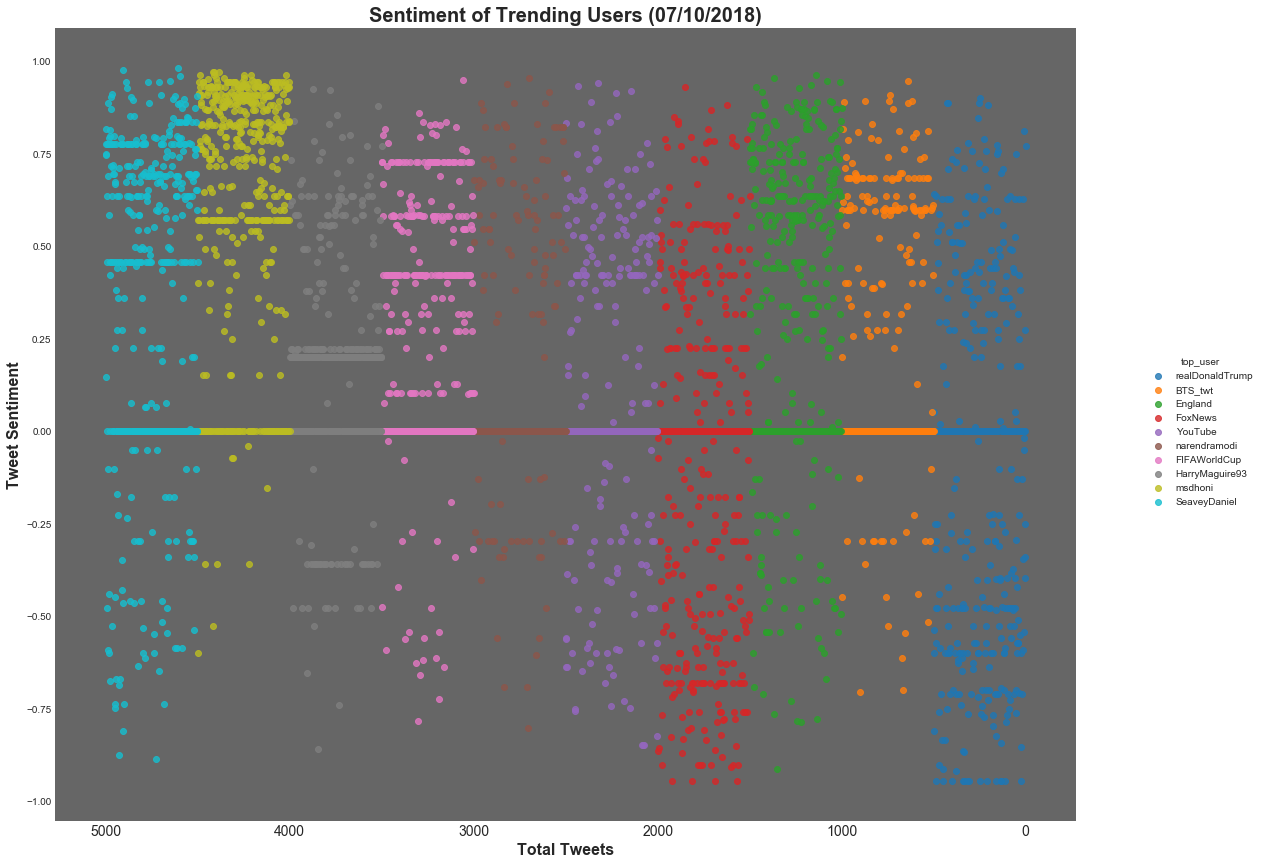

In [50]:
#Plot in seaborn based on compound sentiment
ax = sns.lmplot("tweet_count", "comp", data=df, hue='top_user', fit_reg=False, size=8,aspect=1.3,
               legend_out=True)

sns.set_style('darkgrid', {'axes.facecolor': '.4'})
plt.title("Sentiment of Trending Users (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold',fontsize=20)
plt.xlabel("Total Tweets", fontweight='bold', fontsize=16)
plt.ylabel("Tweet Sentiment", fontweight='bold', fontsize=16)
#invert the x axis
plt.gcf().set_size_inches(18, 12)
plt.gca().invert_xaxis()
plt.xticks(fontsize =14)
plt.grid()
plt.savefig("Sentiment_Analysis.png")

plt.show()

In [45]:
dfwordcloud = df.copy()
#dfwordcloud.drop(dfwordcloud.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,]], axis=1, inplace=True)
dfwordcloud.drop(dfwordcloud.index[3337], inplace=True)

In [46]:
dfwordcloud

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,statuses_count,user_created_at,verified,user_name,description,followers_count,listed,favorites_count,notifications,following
0,0,NaN,NaN,Sat Jul 07 17:31:21 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,47785.0,Fri Apr 17 15:45:33 +0000 2009,False,frances renfer 1959,I am a retired middle school art teacher - Tau...,350.0,NaN,15153.0,False,False
1,1,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,2680.0,Fri Dec 01 15:53:47 +0000 2017,False,wicked smaht patriot,Quietly watching. Sending love .++++++++,539.0,NaN,17028.0,False,False
2,2,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,8921.0,Mon Apr 23 21:54:10 +0000 2018,False,Never Dem Again,#Trump2020...#KAG...#NoTrollZone #blocked...Ob...,1802.0,NaN,4787.0,False,False
3,3,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,804.0,Wed Feb 25 17:47:05 +0000 2015,False,Sam Tennant,así es la vida—UNC ‘22,327.0,NaN,14826.0,False,False
4,4,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,111944.0,Mon Oct 17 20:17:41 +0000 2016,False,and justice for all,"Pillar of Patience, G-MA, Forever Yankee Fan, ...",677.0,NaN,121203.0,False,False
5,5,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,33048.0,Thu Feb 02 01:44:18 +0000 2017,False,Mrrin213N'Jadaka,Leftist toy collector. Texas chick. Mike Patto...,429.0,NaN,109165.0,False,False
6,6,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,8808.0,Fri Nov 04 20:32:54 +0000 2011,False,bearharrumph 🏳️‍🌈😈,"If you can’t Carpe Deim, try to Carpe Testicul...",4951.0,NaN,9228.0,False,False
7,7,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,20555.0,Sun Apr 01 11:02:28 +0000 2018,False,Annette Maillet,NaN,393.0,NaN,20684.0,False,False
8,8,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [{'text': 'ICE', 'indices': [117,...",NaN,0.0,False,NaN,1.015649e+18,...,52965.0,Sun Apr 05 16:35:08 +0000 2009,False,Darlene M Morris,A mature matron on the outside but still a wil...,4951.0,NaN,132080.0,False,False
9,9,NaN,NaN,Sat Jul 07 17:31:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,NaN,1.015649e+18,...,54032.0,Mon Jun 04 13:37:13 +0000 2018,False,Alex Walker,NaN,655.0,NaN,1469.0,False,False


In [47]:
dfwordcloud['text']= dfwordcloud['text'].str.replace("https", "")
dfwordcloud['text']= dfwordcloud['text'].str.replace("rt", "")
dfwordcloud['text'] = dfwordcloud['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
dfwordcloud['text'] = dfwordcloud['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets =dfwordcloud['text']

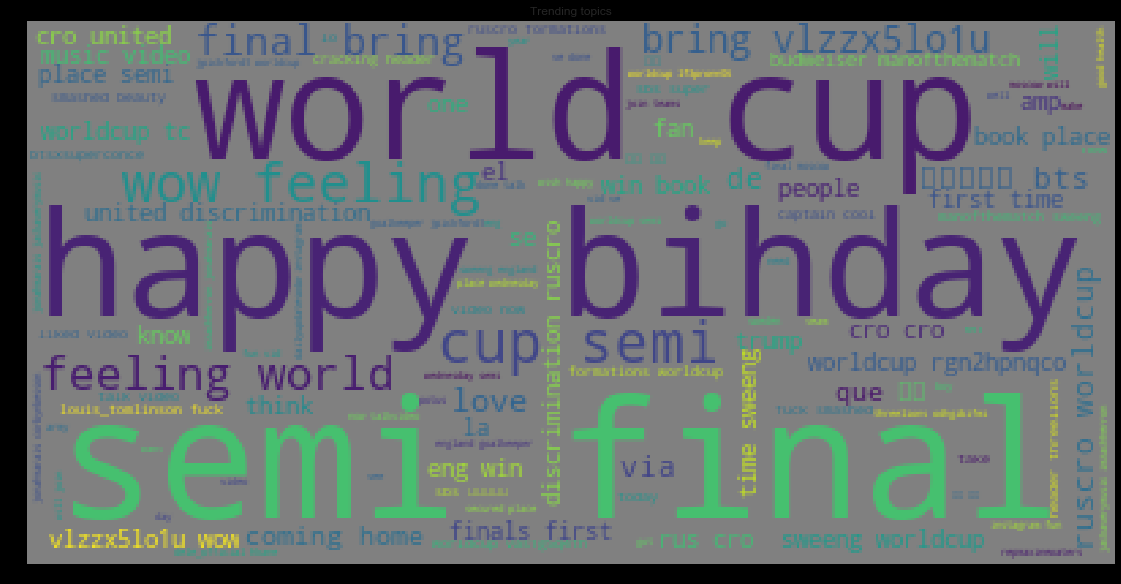

In [48]:
def wordcloud (tweets):
   stopwords = list(set(STOPWORDS))
 
   stopwords.extend(top_names)
   stopwords.extend(["tco","guv52ytcuf",'rt'])
   wordcloud = WordCloud(background_color="grey",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets]))
   plt.figure( figsize=(20,10), facecolor='k')
   plt.imshow(wordcloud)
   plt.axis("off")
   plt.title("Trending topics")
   #print(stopwords)
wordcloud(tweets)

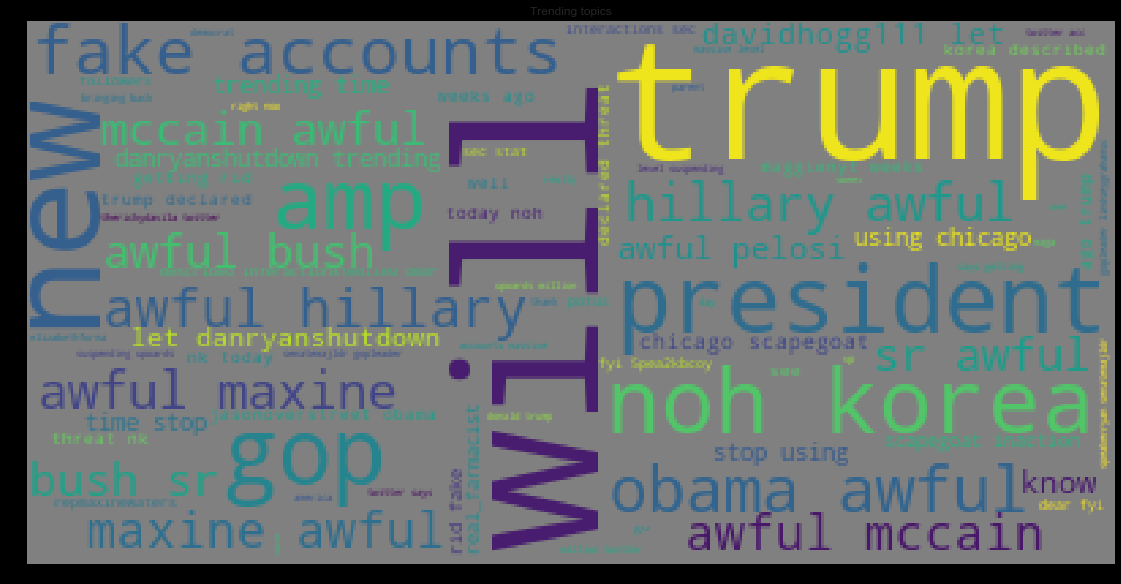

In [11]:
cloud_trump = dfwordcloud[dfwordcloud['top_user']=='realDonaldTrump']
tweets =cloud_trump['text']
wordcloud(tweets)

In [12]:
twitter_lan_csv = "/Users/ZGS/Documents/Data_Bootcamp/Project-Twitter/Resources/twitter_lan.csv"
dflang = pd.read_csv(twitter_lan_csv)
dflang.head()

,Unnamed: 0,lang,Group_lan,top_user,pos,neg,neu,comp,user_screen_name,tweet_count,language
0,0,en,English,realDonaldTrump,0.309,0.000,0.691,0.7712,frenfer123,1,en
1,1,en,English,realDonaldTrump,0.083,0.182,0.735,-0.3975,SandyMa92949039,2,en
2,2,en,English,realDonaldTrump,0.000,0.000,1.000,0.0000,Neverdemagain2,3,en
3,3,en,English,realDonaldTrump,0.000,0.087,0.913,-0.2500,sam_tennant12,4,en
4,4,en,English,realDonaldTrump,0.000,0.117,0.883,-0.3384,PaysonMelissa,5,en


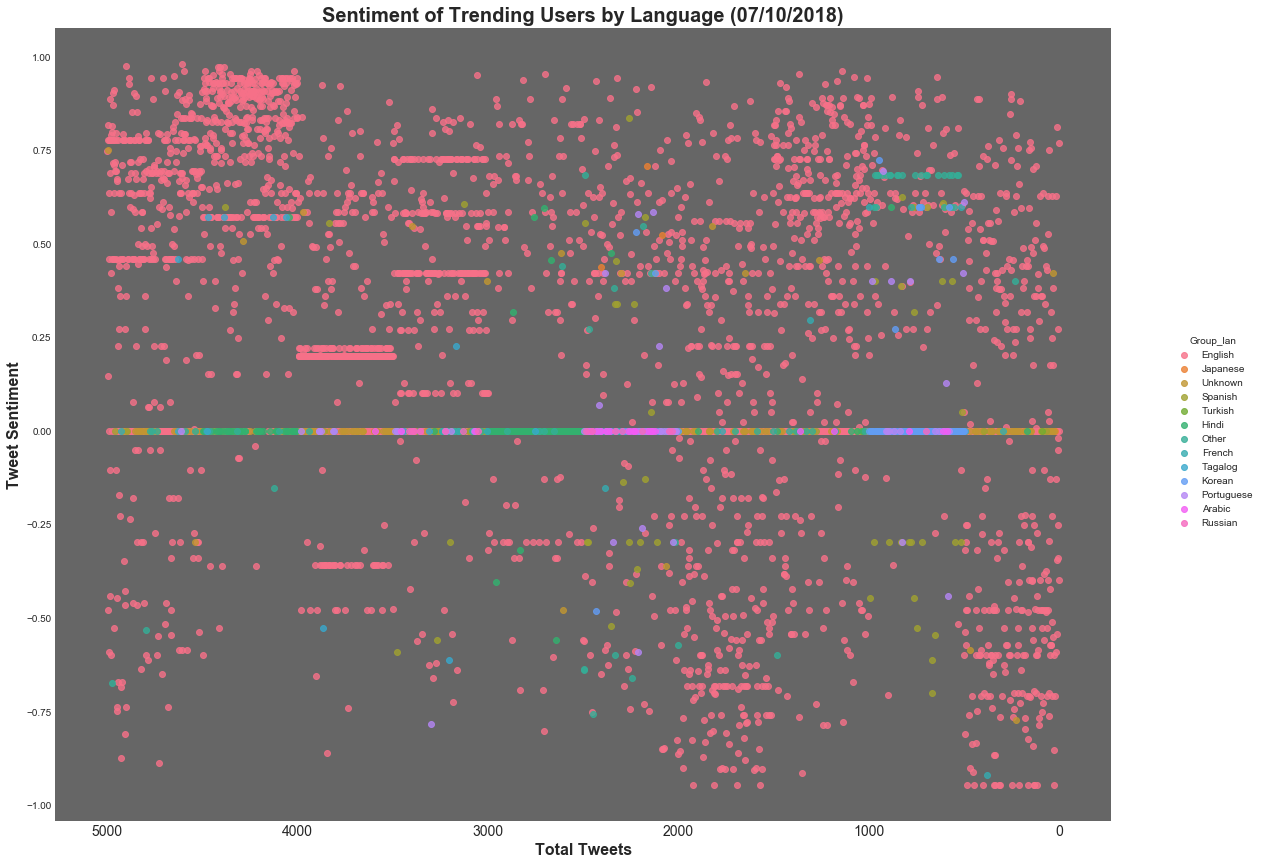

In [34]:
ax = sns.lmplot('tweet_count', 'comp', data=dflang, hue='Group_lan', fit_reg=False, size=8,aspect=1.3,
             legend_out=True)

sns.set_style('darkgrid', {'axes.facecolor': '.4'})
plt.title("Sentiment of Trending Users by Language (%s)" % (time.strftime("%m/%d/%Y")),fontweight ='bold',fontsize=20)
plt.xlabel("Total Tweets", fontweight='bold', fontsize=16)
plt.ylabel("Tweet Sentiment", fontweight='bold', fontsize=16)
#invert the x axis
plt.gcf().set_size_inches(18, 12)
plt.xticks(fontsize=14)
plt.gca().invert_xaxis()
plt.grid()
#plt.savefig(“Sentiment_Analysis.png”)

plt.show()

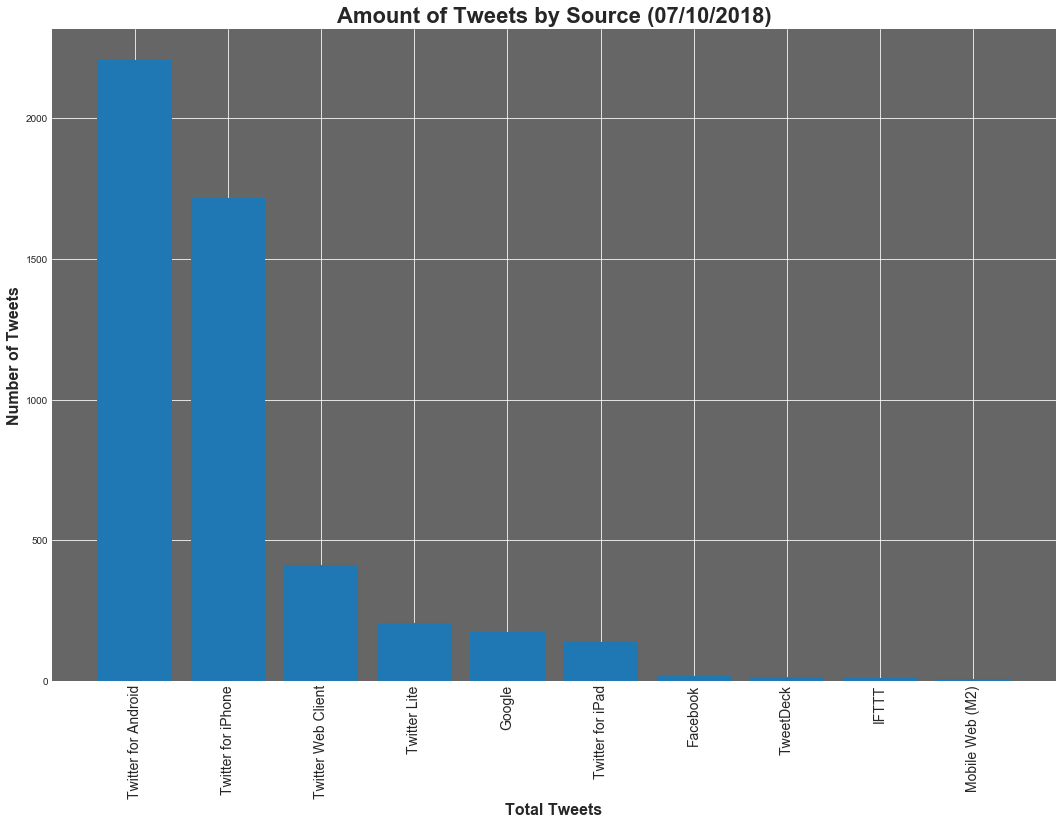

In [15]:
sources =df['source'].value_counts().to_frame().reset_index()[:10]

sources['new'] = sources['index'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

names = sources['new'].tolist()
plt.figure(1, figsize=(18, 12))
values = sources['source'].tolist()
plt.title("Amount of Tweets by Source (%s)" % (time.strftime("%m/%d/%Y")),fontweight ='bold',fontsize=22)
plt.xlabel("Total Tweets", fontweight='bold', fontsize=16)
plt.ylabel("Number of Tweets", fontweight='bold', fontsize=16)
plt.bar(names, values)
plt.xticks(names, names, rotation='vertical', fontsize = 14)

plt.show()

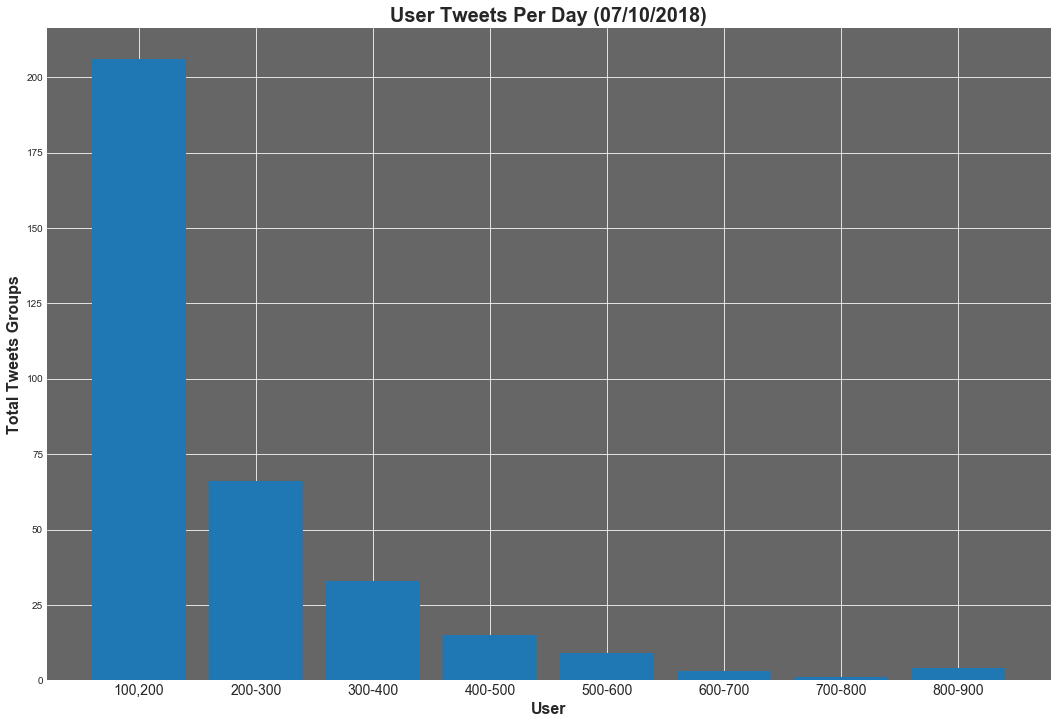

In [16]:
new_df=df.groupby('user_screen_name').head()

df=new_df.sort_values('statuses_count', ascending=False)[:4899].reset_index()

df_date = df['user_screen_name'].to_frame(name='screen_name')

df_date['tweet_date'] = df['created_at'].apply(lambda x: parser.parse(x))

df_date['user_created']=df['user_created_at'].apply(lambda x: parser.parse(x))

df_date['time_delta']=df_date['tweet_date'] - df_date['user_created']

df_date['days'] = df_date['time_delta'].map(lambda x: x.days)

df_date['status_count'] = df['statuses_count']

df_date['tweets_per_day'] = df_date['status_count']/df_date['days']

labels = [100,200,300,400,500,600,700,800,900]

per_day =df_date.groupby(pd.cut(df_date['tweets_per_day'], bins = labels))['status_count'].count().to_frame().reset_index()

per_day

status_count = per_day['status_count'].tolist()
labels = per_day['tweets_per_day'].tolist()

status_count
labels=['100,200','200-300','300-400','400-500','500-600','600-700','700-800','800-900',]

plt.figure(1, figsize=(18, 12))
plt.title("User Tweets Per Day (%s)" % (time.strftime("%m/%d/%Y")),fontweight ='bold',fontsize=20)
plt.xlabel("User", fontweight='bold', fontsize=16)
plt.ylabel("Total Tweets Groups", fontweight='bold', fontsize=16)
plt.xticks(fontsize = 14)
plt.bar(labels, status_count)

plt.show()

In [17]:
# Selected columns for new shorter df of ALL Tweets at 10 users 
df_short = df[['top_user','Unnamed: 0','comp','text','created_at','retweeted_status','user','id','user_created_at','statuses_count','favorites_count','user_screen_name','user_name','description','profile_url']].copy()
df_short['qty'] = 1*1
df_short['cap'] = 0*0
df_short['meter'] =0*0
df_short['boto_name'] = ""
df_short.head()

,top_user,Unnamed: 0,comp,text,created_at,retweeted_status,user,id,user_created_at,statuses_count,favorites_count,user_screen_name,user_name,description,profile_url,qty,cap,meter,boto_name
0,realDonaldTrump,210,0.0000,RT @mr_funsun: 💚#LOVEvolution 💚\n🐼#SkinTintIrr...,Sat Jul 07 17:31:01 +0000 2018,{'created_at': 'Sun Jun 04 15:51:01 +0000 2017...,"{'id': 90804267, 'id_str': '90804267', 'name':...",1.015649e+18,Wed Nov 18 04:52:45 +0000 2009,1266433.0,419252.0,jojokejohn,john lovethemtoyz,For you-enjoy- toys&collectibles-https://t.co/...,http://pbs.twimg.com/profile_images/7374999810...,1,0,0,
1,England,1353,0.5106,England thump New Zealand in first ODI: Half-c...,Sat Jul 07 17:31:23 +0000 2018,NaN,"{'id': 3049283884, 'id_str': '3049283884', 'na...",1.015649e+18,Sat Feb 21 09:54:50 +0000 2015,696856.0,61.0,sportingnewsww,sporting news,Sporting news is here to bring you all the lat...,http://pbs.twimg.com/profile_images/5690915961...,1,0,0,
2,FoxNews,1696,-0.4215,Dr. Marc Siegel: The opioid crisis has a solut...,Sat Jul 07 17:30:57 +0000 2018,NaN,"{'id': 2735511486, 'id_str': '2735511486', 'na...",1.015649e+18,Fri Aug 15 20:59:39 +0000 2014,627843.0,22017.0,JoeFreedomLove,Joe FreedomLover🇺🇸,Trump/PenceUSA 1st; #MAGA; Defeat ISIS; Stop S...,http://pbs.twimg.com/profile_images/5004120552...,1,0,0,
3,FoxNews,1852,0.0000,North Korea says denuclearization talks with P...,Sat Jul 07 17:30:17 +0000 2018,NaN,"{'id': 2735511486, 'id_str': '2735511486', 'na...",1.015649e+18,Fri Aug 15 20:59:39 +0000 2014,627843.0,22017.0,JoeFreedomLove,Joe FreedomLover🇺🇸,Trump/PenceUSA 1st; #MAGA; Defeat ISIS; Stop S...,http://pbs.twimg.com/profile_images/5004120552...,1,0,0,
4,FoxNews,1800,-0.5267,The other North Korea threat -- that almost ne...,Sat Jul 07 17:30:30 +0000 2018,NaN,"{'id': 2735511486, 'id_str': '2735511486', 'na...",1.015649e+18,Fri Aug 15 20:59:39 +0000 2014,627843.0,22017.0,JoeFreedomLove,Joe FreedomLover🇺🇸,Trump/PenceUSA 1st; #MAGA; Defeat ISIS; Stop S...,http://pbs.twimg.com/profile_images/5004120552...,1,0,0,


In [18]:
# Pull TRUMP RECORDS
trump_df = df_short.query('top_user == "realDonaldTrump"')
trump_df.head()

,top_user,Unnamed: 0,comp,text,created_at,retweeted_status,user,id,user_created_at,statuses_count,favorites_count,user_screen_name,user_name,description,profile_url,qty,cap,meter,boto_name
0,realDonaldTrump,210,0.0000,RT @mr_funsun: 💚#LOVEvolution 💚\n🐼#SkinTintIrr...,Sat Jul 07 17:31:01 +0000 2018,{'created_at': 'Sun Jun 04 15:51:01 +0000 2017...,"{'id': 90804267, 'id_str': '90804267', 'name':...",1.015649e+18,Wed Nov 18 04:52:45 +0000 2009,1266433.0,419252.0,jojokejohn,john lovethemtoyz,For you-enjoy- toys&collectibles-https://t.co/...,http://pbs.twimg.com/profile_images/7374999810...,1,0,0,
16,realDonaldTrump,30,0.0000,@blondenfun1 @RoyalFamily @realDonaldTrump Ano...,Sat Jul 07 17:31:18 +0000 2018,NaN,"{'id': 307807275, 'id_str': '307807275', 'name...",1.015649e+18,Mon May 30 09:55:28 +0000 2011,467299.0,1241.0,Stupidosaur,#DestroyTheAadhaar #BanDigitalElections #Defea...,"Engineer who takes pics,makes cartoons,talks o...",http://pbs.twimg.com/profile_images/6227271500...,1,0,0,
17,realDonaldTrump,475,0.3818,"RT @LawWorksAction: ""When @realDonaldTrump tal...",Sat Jul 07 17:30:36 +0000 2018,{'created_at': 'Sat Jul 07 14:13:07 +0000 2018...,"{'id': 1049560369, 'id_str': '1049560369', 'na...",1.015649e+18,Mon Dec 31 05:14:32 +0000 2012,464731.0,448244.0,cheezwitham,lisa witham,NaN,http://pbs.twimg.com/profile_images/3044794822...,1,0,0,
19,realDonaldTrump,266,-0.4019,How ironic that the neocon and Republican esta...,Sat Jul 07 17:30:55 +0000 2018,NaN,"{'id': 2167674121, 'id_str': '2167674121', 'na...",1.015649e+18,Fri Nov 01 03:24:23 +0000 2013,427421.0,417880.0,CarmineZozzora,JointheNRA NOW! 🇺🇸,America is worth saving. #MakeAmericaGreatAgai...,http://pbs.twimg.com/profile_images/9863455225...,1,0,0,
22,realDonaldTrump,105,0.0000,RT @ArizonaKayte: MUST READ THREAD!!!\n\n@Tuck...,Sat Jul 07 17:31:11 +0000 2018,{'created_at': 'Sat Jul 07 17:24:29 +0000 2018...,"{'id': 4739845481, 'id_str': '4739845481', 'na...",1.015649e+18,Fri Jan 08 01:27:41 +0000 2016,425996.0,400807.0,TrumpTrainMRA4,Michael💛 🌾🌺🥂HappySaturday🥂🌺🌾,SavedbyGrace Pilot AeroDesgr @NASA 34Yrs Vet N...,http://pbs.twimg.com/profile_images/1014877760...,1,0,0,


In [19]:
# BOTOMETER: lookup 'accounts' for meter value, cap value, and name check
accounts = trump_df['user_screen_name']
#accounts

In [20]:
## BLOCKED OUT for PRESENTATION
## Retrieve 'BOT' RATINGS from the BOTOMETER WEBSITE 
## RECORD RETRIEVAL is about 1 RECORD per 4 SECONDS, and THERE is a USER LIMIT PER DAY
#import botometer
## Authorizations:
#mashape_key = "AtjAtA78ADmsh6je89knkhTcaXitp17qeVBjsnUbRue0y6tuI0"
#twitter_app_auth = {
#     'consumer_key': 'ba2r2NuTVbWXzgq6SBCoGbY8R',
#     'consumer_secret': 'bAMeX7mUj21LWX8FpEzoQ7sjacBLrTlUcu1s43aJxPXtnhKN15',
#     'access_token': '853742326568677376-GtQ3RoG8iIxidIalAVK9n9h4XxoZizP',
#     'access_token_secret': 'KdSFuPtjjyTZynl4aZbdoapSr3zxXC69QSWd6J7SfJSPe',
#   }
# bom = botometer.Botometer(wait_on_ratelimit=True,
#                           mashape_key=mashape_key,
#                           **twitter_app_auth)
## Variables and get Botometer information
# boto_name = []
# caps = []
# meter_score = []
# count = 1*1
# NaN = "NaN"
# for screen_name, result in bom.check_accounts_in(accounts):
#     try:
#         print(count)
#         print(screen_name)
#         scrn_name = result['user']['screen_name'] # used for double checking
#         boto_name.append(scrn_name)
#         cap = result['cap']['english'] # Overall score %
#         caps.append(cap)
#         meter = result['display_scores']['english']
#         meter_score.append(meter)
#         count += 1
#         print(caps)
#         print(boto_name)
#         print(meter_score)
#         print("__________________________")
#      
#     except:
#         print(count)
#         count += 1
#         print("Skipping due to error")
#         boto_name.append(NaN)
#         caps.append(NaN)
#         meter_score.append(NaN)
#         print("__________________________")

In [21]:
#Hard code backup: cap values for presentation
caps = [0.0020801266669107617, 0.31925820414416145, 0.07583235670880943, 0.0014828129117616376, 0.014543680863094452, 0.0022344951904619756, 0.0034565375041747688, 0.021603216955146855, 0.032183220269696264, 0.06706338835674493, 0.0012183789109573519, 0.028225552221050176, 0.007724054879521963, 0.07583235670880943, 0.00682617488477388, 0.0038317559975942547, 0.2564674002687074, 0.0060434470460022415, 0.011259346570646776, 0.00682617488477388, 0.004268306222830912, 0.014543680863094452, 0.15990913252190533, 0.08590409243653727, 0.0060434470460022415, 0.009922300094567935, 0.0012616932230026553, 0.22851217352302083, 0.0024124820419756166, 0.008750694009244317, 0.0038317559975942547, 0.002856940094612955, 0.0019457839054003979, 0.007724054879521963, 0.00682617488477388, 0.008750694009244317, 0.008750694009244317, 0.007724054879521963, 0.05272348371475359, 0.0026183131920431966, 0.5650534221025286, 0.02470203924309943, 0.032183220269696264, 0.008750694009244317, 0.004268306222830912, 0.14157391067567082, 0.5114515477139734, 0.004268306222830912, 0.0018284205282117316, 0.003134129284123964, 0.22851217352302083, 0.0016347149115980926, 0.008750694009244317, 0.05942480200270631, 0.0020801266669107617, 0.012788431177246198, 0.09741389119048932, 0.0013611897321404152, 0.007724054879521963, 0.0024124820419756166, 0.15990913252190533, 0.0016347149115980926, 0.00682617488477388, 0.007724054879521963, 0.046773782504080826, 0.04142512584947667, 0.0060434470460022415, 0.18036203754175442, 0.9446742630045359, 0.012788431177246198, 0.2564674002687074, 0.004268306222830912, 0.014543680863094452, 0.22851217352302083, 0.06706338835674493, 0.004775575529426348, 0.0024124820419756166, 0.0024124820419756166, 0.003134129284123964, 0.3528904417922491, 0.011259346570646776, 0.007724054879521963, 0.004775575529426348, 0.003134129284123964, 0.0038317559975942547, 0.05942480200270631, 0.0022344951904619756, 0.0024124820419756166, 0.31925820414416145, 0.004775575529426348, 0.0038317559975942547, 0.0038317559975942547, 0.0020801266669107617, 0.0013611897321404152, 0.018904416758651326, 0.0022344951904619756, 0.005363701003450149, 0.15990913252190533, 0.0020801266669107617, 0.021603216955146855, 0.5650534221025286, 0.0016347149115980926, 0.003134129284123964, 0.016566752245969804, 0.004268306222830912, 0.5114515477139734, 0.0060434470460022415, 0.11046376827194711, 0.03657805288858329, 0.0014187924969112314, 0.028225552221050176, 0.012788431177246198, 0.0024124820419756166, 0.0020801266669107617, 0.0024124820419756166, 0.00682617488477388, 0.0012183789109573519, 0.0015543510151536995, 0.28686866458066024, 0.02470203924309943, 0.004775575529426348, 0.002856940094612955, 0.12514574764971045, 0.004268306222830912, 0.004775575529426348, 0.00682617488477388, 0.011259346570646776, 0.021603216955146855, 0.003134129284123964, 0.05942480200270631, 0.14157391067567082, 0.18036203754175442, 0.0020801266669107617, 0.0019457839054003979, 0.5387761106184944, 0.14157391067567082, 0.011259346570646776, 0.0024124820419756166, 0.0060434470460022415, 0.0038317559975942547, 0.004268306222830912, 0.014543680863094452, 0.0020801266669107617, 0.003134129284123964, 0.03657805288858329, 0.05942480200270631, 0.04142512584947667, 0.004268306222830912, 0.046773782504080826, 0.20316525868115767, 0.004775575529426348, 0.018904416758651326, 0.004268306222830912, 0.28686866458066024, 0.0013611897321404152, 0.018904416758651326, 0.04142512584947667, 0.008750694009244317, 0.02470203924309943, 0.0022344951904619756, 0.31925820414416145, 0.07583235670880943, 0.012788431177246198, 0.0013611897321404152, 0.0015543510151536995, 0.011259346570646776, 0.0016347149115980926, 0.0034565375041747688, 0.06706338835674493, 0.002856940094612955, 0.007724054879521963, 0.016566752245969804, 0.0014828129117616376, 0.021603216955146855, 0.0019457839054003979, 0.14157391067567082, 0.0018284205282117316, 0.2564674002687074, 0.0038317559975942547, 0.05272348371475359, 0.0012616932230026553, 0.0038317559975942547, 0.003134129284123964, 0.0026183131920431966, 0.002856940094612955, 0.0019457839054003979, 0.014543680863094452, 0.028225552221050176, 0.0022344951904619756, 0.0014828129117616376, 'NaN', 0.008750694009244317, 0.0034565375041747688, 0.003134129284123964, 0.08590409243653727, 0.001309081196579327, 0.09741389119048932, 0.0013611897321404152, 0.003134129284123964, 0.04142512584947667, 0.003134129284123964, 0.003134129284123964, 0.003134129284123964, 0.0016347149115980926, 0.0034565375041747688, 0.0060434470460022415, 0.014543680863094452, 0.0015543510151536995, 0.0020801266669107617, 0.001725457650971877, 0.032183220269696264, 0.001725457650971877, 0.05942480200270631, 0.002856940094612955, 0.0019457839054003979, 0.05272348371475359, 0.0038317559975942547, 0.011259346570646776, 0.002856940094612955, 0.007724054879521963, 0.31925820414416145, 0.012788431177246198, 0.0019457839054003979, 0.0038317559975942547, 0.0038317559975942547, 0.001725457650971877, 0.14157391067567082, 0.011259346570646776, 0.008750694009244317, 0.04142512584947667, 0.012788431177246198, 0.007724054879521963, 0.005363701003450149, 0.021603216955146855, 0.004775575529426348, 0.0026183131920431966, 0.014543680863094452, 0.014543680863094452, 0.0026183131920431966, 0.028225552221050176, 0.0019457839054003979, 0.005363701003450149, 0.008750694009244317, 0.012788431177246198, 0.018904416758651326, 0.22851217352302083, 0.021603216955146855, 0.0038317559975942547, 0.12514574764971045, 0.007724054879521963, 0.009922300094567935, 0.0020801266669107617, 0.003134129284123964, 0.003134129284123964, 0.032183220269696264, 0.0034565375041747688, 0.011259346570646776, 0.20316525868115767, 0.0014187924969112314, 0.0011785984309163565, 0.0024124820419756166, 0.014543680863094452, 0.0038317559975942547, 0.0060434470460022415, 0.001725457650971877, 0.014543680863094452, 0.04142512584947667, 0.007724054879521963, 0.05272348371475359, 0.011259346570646776, 0.0012183789109573519, 0.12514574764971045, 0.0038317559975942547, 0.016566752245969804, 0.012788431177246198, 0.0060434470460022415, 0.3868425932473016, 0.007724054879521963, 0.014543680863094452, 0.0022344951904619756, 0.0014828129117616376, 0.04142512584947667, 0.08590409243653727, 0.0038317559975942547, 0.014543680863094452, 0.02470203924309943, 0.0026183131920431966, 0.002856940094612955, 0.0060434470460022415, 0.046773782504080826, 0.0060434470460022415, 0.12514574764971045, 0.09741389119048932, 0.04142512584947667, 0.8469348665516686, 0.002856940094612955, 0.018904416758651326, 0.0013611897321404152, 0.2564674002687074, 0.0022344951904619756, 0.005363701003450149, 0.0019457839054003979, 0.009922300094567935, 0.0020801266669107617, 0.005363701003450149, 0.001725457650971877, 0.007724054879521963, 0.0038317559975942547, 0.011259346570646776, 0.002856940094612955, 0.11046376827194711, 0.0022344951904619756, 0.20316525868115767, 0.005363701003450149, 0.011259346570646776, 0.002856940094612955, 0.032183220269696264, 0.0038317559975942547, 0.001309081196579327, 0.007724054879521963, 0.003134129284123964, 0.0060434470460022415, 0.003134129284123964, 0.002856940094612955, 0.005363701003450149, 0.004775575529426348, 0.0038317559975942547, 0.0014828129117616376, 0.0015543510151536995, 0.0038317559975942547, 0.011259346570646776, 0.0020801266669107617, 0.005363701003450149, 0.5650534221025286, 0.005363701003450149, 0.014543680863094452, 0.0034565375041747688, 0.0016347149115980926, 0.00682617488477388, 0.001725457650971877, 0.011259346570646776, 0.0022344951904619756, 0.011259346570646776, 0.0060434470460022415, 0.0022344951904619756, 0.06706338835674493, 0.31925820414416145, 0.002856940094612955, 0.28686866458066024, 0.003134129284123964, 0.0022344951904619756, 0.012788431177246198, 0.15990913252190533, 0.009922300094567935, 0.004268306222830912, 0.001725457650971877, 0.014543680863094452, 0.016566752245969804, 0.012788431177246198, 0.0019457839054003979, 0.0022344951904619756, 0.021603216955146855, 0.04142512584947667, 0.03657805288858329, 0.03657805288858329, 0.004268306222830912, 0.14157391067567082, 0.009922300094567935, 0.00682617488477388, 0.0034565375041747688, 0.04142512584947667, 0.046773782504080826, 0.004775575529426348, 0.0014828129117616376, 0.001725457650971877, 0.18036203754175442, 0.14157391067567082, 0.007724054879521963, 0.003134129284123964, 0.05942480200270631, 0.0013611897321404152, 0.0024124820419756166, 0.0034565375041747688, 0.001725457650971877, 0.0016347149115980926, 0.11046376827194711, 0.05272348371475359, 0.001725457650971877, 0.0019457839054003979, 0.0018284205282117316, 0.5906777151076118, 0.0016347149115980926, 0.48270052072345504, 0.00682617488477388, 0.20316525868115767, 0.012788431177246198, 0.0024124820419756166, 0.09741389119048932, 0.012788431177246198, 0.06706338835674493, 0.003134129284123964, 0.016566752245969804, 0.016566752245969804, 0.0034565375041747688, 0.028225552221050176, 0.06706338835674493, 0.5114515477139734, 0.0014828129117616376, 0.004775575529426348, 0.0015543510151536995, 0.00682617488477388, 0.011259346570646776, 0.009922300094567935, 0.02470203924309943, 0.0038317559975942547, 0.005363701003450149, 0.014543680863094452, 0.009922300094567935, 0.0038317559975942547, 0.016566752245969804, 0.0022344951904619756, 0.00682617488477388, 0.07583235670880943, 0.012788431177246198, 0.42020504633925215, 0.0019457839054003979, 0.003134129284123964, 0.009922300094567935, 0.09741389119048932, 0.0034565375041747688, 0.0014828129117616376, 0.04142512584947667, 0.0014187924969112314, 0.0016347149115980926, 0.005363701003450149, 0.009922300094567935, 0.001309081196579327, 0.0022344951904619756, 0.0018284205282117316, 0.012788431177246198, 0.0024124820419756166, 0.05272348371475359, 0.004775575529426348, 0.046773782504080826, 0.046773782504080826, 0.007724054879521963, 0.0024124820419756166, 0.04142512584947667, 0.0060434470460022415, 0.012788431177246198, 0.0038317559975942547, 0.0022344951904619756, 0.016566752245969804, 0.004268306222830912, 0.018904416758651326, 0.008750694009244317, 0.003134129284123964, 0.0014828129117616376, 0.0034565375041747688, 0.004775575529426348, 0.002856940094612955, 0.0038317559975942547, 0.0038317559975942547, 0.0012183789109573519, 0.45227900229523627, 0.0026183131920431966, 0.0060434470460022415, 0.05272348371475359, 0.11046376827194711, 0.0024124820419756166, 0.032183220269696264, 0.004268306222830912, 0.0060434470460022415, 0.5387761106184944, 0.02470203924309943, 0.03657805288858329, 0.03657805288858329, 0.0014187924969112314, 0.5387761106184944, 0.0022344951904619756, 0.0013611897321404152, 0.011259346570646776, 0.001309081196579327, 0.009922300094567935, 0.0024124820419756166, 0.02470203924309943, 0.0034565375041747688, 0.0060434470460022415, 0.0016347149115980926, 0.02470203924309943, 0.003134129284123964, 0.18036203754175442, 0.14157391067567082, 0.001725457650971877, 0.0022344951904619756, 0.0015543510151536995, 0.0019457839054003979, 0.6913231693056707, 0.0026183131920431966, 0.004268306222830912]
trump_df['cap'] = caps
#print(caps)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#Hard code backup: meter_score for presenation
meter_score = [0.3, 3.5, 2.3, 0.2, 1.1, 0.3, 0.5, 1.3, 1.6, 2.2, 0.1, 1.5, 0.8, 2.3, 0.7, 0.5, 3.3, 0.7, 1.0, 0.7, 0.5, 1.1, 3.0, 2.4, 0.7, 0.9, 0.1, 3.3, 0.3, 0.8, 0.5, 0.4, 0.3, 0.8, 0.7, 0.8, 0.8, 0.8, 2.0, 0.4, 4.1, 1.4, 1.6, 0.8, 0.5, 2.8, 4.0, 0.5, 0.2, 0.4, 3.3, 0.2, 0.8, 2.1, 0.3, 1.0, 2.5, 0.2, 0.8, 0.3, 3.0, 0.2, 0.7, 0.8, 1.9, 1.8, 0.7, 3.1, 4.8, 1.0, 3.3, 0.5, 1.1, 3.3, 2.2, 0.6, 0.3, 0.3, 0.4, 3.6, 1.0, 0.8, 0.6, 0.4, 0.5, 2.1, 0.3, 0.3, 3.5, 0.6, 0.5, 0.5, 0.3, 0.2, 1.3, 0.3, 0.6, 3.0, 0.3, 1.3, 4.1, 0.2, 0.4, 1.2, 0.5, 4.0, 0.7, 2.6, 1.7, 0.2, 1.5, 1.0, 0.3, 0.3, 0.3, 0.7, 0.1, 0.2, 3.4, 1.4, 0.6, 0.4, 2.7, 0.5, 0.6, 0.7, 1.0, 1.3, 0.4, 2.1, 2.8, 3.1, 0.3, 0.3, 4.1, 2.8, 1.0, 0.3, 0.7, 0.5, 0.5, 1.1, 0.3, 0.4, 1.7, 2.1, 1.8, 0.5, 1.9, 3.2, 0.6, 1.3, 0.5, 3.4, 0.2, 1.3, 1.8, 0.8, 1.4, 0.3, 3.5, 2.3, 1.0, 0.2, 0.2, 1.0, 0.2, 0.5, 2.2, 0.4, 0.8, 1.2, 0.2, 1.3, 0.3, 2.8, 0.2, 3.3, 0.5, 2.0, 0.1, 0.5, 0.4, 0.4, 0.4, 0.3, 1.1, 1.5, 0.3, 0.2, 'NaN', 0.8, 0.5, 0.4, 2.4, 0.1, 2.5, 0.2, 0.4, 1.8, 0.4, 0.4, 0.4, 0.2, 0.5, 0.7, 1.1, 0.2, 0.3, 0.2, 1.6, 0.2, 2.1, 0.4, 0.3, 2.0, 0.5, 1.0, 0.4, 0.8, 3.5, 1.0, 0.3, 0.5, 0.5, 0.2, 2.8, 1.0, 0.8, 1.8, 1.0, 0.8, 0.6, 1.3, 0.6, 0.4, 1.1, 1.1, 0.4, 1.5, 0.3, 0.6, 0.8, 1.0, 1.3, 3.3, 1.3, 0.5, 2.7, 0.8, 0.9, 0.3, 0.4, 0.4, 1.6, 0.5, 1.0, 3.2, 0.2, 0.1, 0.3, 1.1, 0.5, 0.7, 0.2, 1.1, 1.8, 0.8, 2.0, 1.0, 0.1, 2.7, 0.5, 1.2, 1.0, 0.7, 3.7, 0.8, 1.1, 0.3, 0.2, 1.8, 2.4, 0.5, 1.1, 1.4, 0.4, 0.4, 0.7, 1.9, 0.7, 2.7, 2.5, 1.8, 4.6, 0.4, 1.3, 0.2, 3.3, 0.3, 0.6, 0.3, 0.9, 0.3, 0.6, 0.2, 0.8, 0.5, 1.0, 0.4, 2.6, 0.3, 3.2, 0.6, 1.0, 0.4, 1.6, 0.5, 0.1, 0.8, 0.4, 0.7, 0.4, 0.4, 0.6, 0.6, 0.5, 0.2, 0.2, 0.5, 1.0, 0.3, 0.6, 4.1, 0.6, 1.1, 0.5, 0.2, 0.7, 0.2, 1.0, 0.3, 1.0, 0.7, 0.3, 2.2, 3.5, 0.4, 3.4, 0.4, 0.3, 1.0, 3.0, 0.9, 0.5, 0.2, 1.1, 1.2, 1.0, 0.3, 0.3, 1.3, 1.8, 1.7, 1.7, 0.5, 2.8, 0.9, 0.7, 0.5, 1.8, 1.9, 0.6, 0.2, 0.2, 3.1, 2.8, 0.8, 0.4, 2.1, 0.2, 0.3, 0.5, 0.2, 0.2, 2.6, 2.0, 0.2, 0.3, 0.2, 4.2, 0.2, 3.9, 0.7, 3.2, 1.0, 0.3, 2.5, 1.0, 2.2, 0.4, 1.2, 1.2, 0.5, 1.5, 2.2, 4.0, 0.2, 0.6, 0.2, 0.7, 1.0, 0.9, 1.4, 0.5, 0.6, 1.1, 0.9, 0.5, 1.2, 0.3, 0.7, 2.3, 1.0, 3.8, 0.3, 0.4, 0.9, 2.5, 0.5, 0.2, 1.8, 0.2, 0.2, 0.6, 0.9, 0.1, 0.3, 0.2, 1.0, 0.3, 2.0, 0.6, 1.9, 1.9, 0.8, 0.3, 1.8, 0.7, 1.0, 0.5, 0.3, 1.2, 0.5, 1.3, 0.8, 0.4, 0.2, 0.5, 0.6, 0.4, 0.5, 0.5, 0.1, 3.9, 0.4, 0.7, 2.0, 2.6, 0.3, 1.6, 0.5, 0.7, 4.1, 1.4, 1.7, 1.7, 0.2, 4.1, 0.3, 0.2, 1.0, 0.1, 0.9, 0.3, 1.4, 0.5, 0.7, 0.2, 1.4, 0.4, 3.1, 2.8, 0.2, 0.3, 0.2, 0.3, 4.4, 0.4, 0.5]
trump_df['meter'] = meter_score
#print(meter_score)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#Hard code backup: boto_name for presentation
boto_name = ['frenfer123', 'SandyMa92949039', 'Neverdemagain2', 'sam_tennant12', 'PaysonMelissa', 'mrrin213', 'bearharrumph', 'AnnetteMaillet3', 'mgtythor', 'AlexWal1980', '_Ericccccc', 'Bluesman57', 'ladamsrib', 'JodyC27', 'THATjonballard', 'lturner3108', 'LaredoAL', 'fancyfrog1337', 'GreatThee', 'izunoeigorou', 'jusfow', 'spandabelike', 'BencomoGail', 'oneHigginsDavid', 'squashzilla', 'kneesee79', 'Studio9Glen', 'DontMockMyTypos', 'kastlbend', 'myhappylife2020', 'Stupidosaur', 'DavidHumanzee', 'ktpasa', 'Rebashoenfelt1', 'valkyrie_hanna', 'theresa_brown50', 'Trupik127', 'dellacurran1', 'freddiechurro13', 'Smartiecats', 'raoul0430', 'jitendersoni133', 'kimmy52216977', 'raylene_resists', 'thomashourigan1', 'IAMParatiSi', 'PhyllisCowan', 'sunbeltengines', 'UnerasedUniv6', 'schachin', 'rav1960', 'RedVinesRedWine', 'dmacdonald1966', '5b20be6386164f8', 'GDawgForever', 'jjfaux82', 'scholt7', 'philtheswo', 'proudveteran63', 'wilburmeinen', 'Jaypeah', 'NishaNishimoto', 'Spiritof1773', 'cheetofacts', 'nygye', 'CharMac50', 'RojelioD', 'MCarolaNunez', 't3D45FwOb5kRKwy', 'mzzgotti1', 'DontMockMyTypos', 'bjdrues', 'Hereand66987608', 'VijayAr21020032', 'JamesABryant8', 'annmlee1', 'GillMark1709', 'JohnWayneLegend', 'GeenaJagger', 'mcivkr', 'JimmyStreich', 'nowaygirltv', 'Angelrubyring', 'joecarruba', 'ANN13951880', 'SJMoore64', 'Cunneenmachine', 'amuzme420', 'AnnaApp91838450', 'hobitcumasi', 'nicosat', 'BeulahTamborel1', 'FriendsofUKIPLl', 'Notorious_ZEB', 'ByroadsChelsie', 'buffalo_girl', 'kafd214', 'BencomoGail', 'sheadyacres', 'LANURSE1', 'Kaleesa6', 'laura_garvock', 'palomacreative', 'dmduffy6666', 'SammieGirlRSD', 'TrumpTrainMRA4', 'judemgreen', '72washington', 'richrake', 'lindyk20', 'hayne7', 'chilepeppermama', 'lorenzoVon38', 'debjensen360', 'tootame', 'spennington33', 'TexasPharmD', 'JordanGranados', '32jim2', 'crzymom110', 'DrMcKuKu', 'h2oswmn', 'Hitofan', 'yiayia62847', 'tcjepson', 'sperrin20', 'lizbethklein', 'Haytham_MG', 'RandyBMan', 'rhonda_harbison', 'cAlabaZa04901Je', 'sharonjlake', 'tomchappell', 'VioletAndSilver', 'USAloveGOD', 'RonCunningham', 'lovetreeskk', 'LDBPNV', 'BradParker_', 'booksbygin50', 'Sheamous89', 'divot1040', 'Its_All_Taken', 'jerimickelberry', 'EliseGr02404357', '5b20be6386164f8', 'D_Mass', 'spetersaz', 'mlogeman', 'LeeCapobianco1', 'JamesAr19476462', 'batliner_julia', 'rocktalkbox', 'JamesWa55188246', 'CPTDisgruntled', 'lunargranny', 'xbz2017', 'Happy01686651', 'PNewmanBennett', 'jeff14mail', 'Jan2Kole', 'chipolitics', 'Robbyusee', 'Reneeb4327', 'ckcrider', 'robert_sicario', 'Birdboy1981', 'prairie0597', 'Kupi_Zak', 'lttlgreenish', 'TerraGravity', 'Photog_NateHart', 'yungefdabean', 'Dangermmm', 'Taffy_Tart', 'duckman511', 'jeancunningham2', 'niksnook57', 'TiffanieMarcum', 'AileenMoffatt', 'Barbara_AOK', 'SexBanJohn', 'PSP7530', 'wtryonjr', 'OSGdirector', 'mamacross03', 'RobertWorthley', 'retvantq1', 'KellyKnor', 'SanduzzoPSL', 'NaN', 'Del56', 'AprilGreen93', 'billhenwood', 'DJBurn77', 'Coverciae_731', 'midwestcher', 'angelauk1900', 'DebraFletcher17', 'xbz2017', 'emilialuxa', 'BlueLn91', 'Grace4NY', 'Raqib_Ali_', 'DSoonerborn', 'AZHotTopics', 'LBarto_1952', 'Borgy_1978', 'Goofydad', 'bebemariiee', 'jojokejohn', 'NIAbbot', 'IcyBrown3', 'shara76', 'BarryOCommunist', 'sherluck_h', 'SpudLovr', 'Squiddlle', 'justwongirl', 'pamo6107', 'LeighAnnStewar8', 'Halabutt1', 'welldoneAI', 'grayjonv', 'ZagCsik', 'kalia273', 'Donna53217165', 'perrypines', 'PuniTenshu', 'xbz2017', 'LMagurck', 'GLSCHWALL', 'friest_len', 'scarlett_0hara', 'SharonCoryell3', 'NoToTheRight', 'patty_hawthorne', 'EmeldaA4', 'Pete4709', 'PickleJar10', 'SusiBV', 'dnj732', 'Citlaivi', 'mayrasons2', 'michaelsaint13', 'Patriot_Mom_17', 'MarletJones', 'meherrn', 'PradRachael', 'Kali_Wolf_888', 'Melissa53611', 'QeyeTDogbytes', 'Max96244404', 'KipHarris11', 'PatriotSally', 'TJFrazier006', 'Roger68376925', 'Winshield20', 'Kimma_S', 'idoseerussia', 'RetireNluvIT', 'LBarto_1952', 'Wilson1Theresa', 'VisibleSocSci', 'Oooooo_Donna', 'PlattWannabe', 'CarmineZozzora', 'pamo6107', 'MartinPujdak', 'NMartel54', 'darwinwoodka', 'sapayne8', 'Uniteusall12', 'Photog_NateHart', 'NottaTrolla', 'GadflyQuebec', 'di_plora', 'jimmythegote', 'Idryvfast', 'tr_williams', 'corinna_1981', 'xbz2017', 'DJBurn77', 'ANN13951880', 'JanetLe29397084', 'PNewmanBennett', 'coolncalm3', 'inertaliens', 'MountainRancher', 'lindseyforeal', 'RohanPinto', 'patsy_lee_green', 'scholt7', 'thegeekdudez', 'CERAP_Paris', 'Cynical_turd', 'andrefisher5931', 'MatthewK33', 'RebeccaSprunger', 'JosephRZarba', 'bonafideartist', 'Biggccman', 'Pell48', 'USHwy34', 'PamelaStovall6', 'DonnaCo4567890', 'pamo6107', 'PlinkinPatriot', 'ShenoahAlways', 'shottydread22', 'conservmia', 'rockinrobintwts', 'LeeCapobianco1', 'TerminalCreache', 'CozmoLizard', 'Mikeymgm1701', 'smc752', 'rcrlc8721', 'grrrr72', 'luisyahdiel3', 'resist_detroit1', 'RoscoeSauza', 'joecarruba', 'Tina51105580', 'LoveForAll24', 'irispraytan', 'GolasKathleen', 'fas1242', 'tweetflex', 'KarlSwain10', 'usageb170', 'mwh52', 'johndowe49', 'Luisraos', 'annetonie', 'EmeldaA4', 'loria_dawson', 'lonjets', 'sperrin20', 'Eloriel', 'alainmarle', 'classynogin', 'perrypines', 'LisaLew64739529', 'mutex7', 'thetheresac', 'di_plora', 'JJH789', 'VasilyAbogado', 'ERGA497511', 'eraofmoon', 'LMagurck', 'ravena68', 'leecobbonbass', 'JaksMimi', 'CPaRhon', 'StephenPetters6', 'Riponite', 'Star8400CPD', 'mellian1', 'mellymagscopy17', 'VoteTrumpPence7', 'kaseyredus', 'peanuts152', 'Stephen25719292', 'CarolFischbach1', 'NanaDavis_46', 'tomrichardson1', 'Serena_Jor', 'jasmine62246739', 'EddieDonovan', 'CarelockTim', 'kimcook49790981', 'ajfleming81', 'WellsIAm', 'littletujunga1', 'saurabhprasad', 'pamo6107', 'Retired_Now', 'Murphy931339211', 'VCurrentAffairs', 'PortableRockArt', 'save_democracy', 'mr_dsantos', 'vcntekbs', 'TPCLJ', 'Truth2Dj', 'alexroupakia', 'MarcusLDoss', 'beegSF', 'menares1945', 'mdsnkm', 'HerbertLubitz', 'Refracting', 'odecanha', 'JonieJesus1st', 'margo94', 'manzanares_ron', 'EmeldaA4', 'FlyFishingChef', 'mik84256067', 'jamielynn_xx', 'DavidRuch2', 'MsCjay', 'RomneyJudith', 'BigFish3000', 'superyayadize', 'Thee_Johnny', 'bakerbyaccident', 'Pattysanchez95', 'BBallBitchin', 'Gmanc95Castillo', 'BarbaraDadam', 'TigressLilly1', 'not6016', 'inspectorplanet', 'BryanSnow3', 'PatrioticKK', 'TeamB21919030', 'jacquesmanya', 'jnotestein', 'JanetPageHill', '034Davidhv1', 'MinaSuki143', 'Rambling_Lady', 'JanetF862258', 'mtlaurelbarb', 'bugg_ray', 'KimRoberts316', 'SOCJUSTICEDEATH', 'yungefdabean', 'InforAlemany', 'csatennis', 'jameslatoff', '21sunshine64', 'StubobNumbersAR', 'beharu', 'katemccloudsays', 'EddieH63', 'CareyJo95846484', 'TheSpeaker2012', 'SmokeyMtnStrong', 'hobitcumasi', 'TJSeraphim', 'it_middle', 'pamo6107', 'chocolatMILF', 'sccrgirl1718', 'squashzilla', 'RealBuzMartin', 'curmudgeon_girl', 'chandlertroyd', 'dekelley14', 'ForeverTepsMom', 'ChristinaZacker', 'dmacdonald1966', 'Jmacliberty', 'bbuddhas', 'MalcolmFarley', 'BaileyBono', 'joejacksonlive', 'whogotlaptop', 'ANN13951880', 'Nimasema', 'b918fvc', 'JamesRusselforc', 'OurbabyMinx', 'spanglesvi', 'scholt7', 'chelhidden', 'CarolineGasper1', 'texor2012', 'keyzpleez', 'MusingCat2014', 'scarlett_0hara', 'cheezwitham', 'farr_mimi', 'wandaransom', 'USAloveGOD', 'Unexpectedactiv', 'HeelStCloud', 'lynecarr', 'BBunjaporte_15', 'MAGAToday1', 'Rewind_Design', 'slaten_lora', 'Reader_14001', 'Lise_Borsum', 'RevDavidPSmith', 'WI4Palin', 'dansturn_views', 'timmy_rev', 'BerriePelser', 'DiXiEjO68', 'donaldrickert', 'StephanieSidley', 'RHeightsFinest', 'mandymendez90', 'Dougy_Hamilton', 'spetersaz']
trump_df['boto_name'] = boto_name
#print(boto_name)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#For PRESENTATION, read in prepared csv file  (each record in the botometer takes 4 seconds to process)
#trump_df.to_csv('trump_df.csv')

# NOTE:  if this file fails, the data is already created and hardcoded as backup, and will run
#twitter_data_csv = "/Users/ZGS/Documents/Data_Bootcamp/Project-Twitter/Resources/Twitter_Data.csv"
df = pd.read_csv(twitter_data_csv)
# Presentation Data file
file = "/Users/ZGS/Documents/Data_Bootcamp/Project-Twitter/Resources/trump_df.csv"
#trump_df = pd.read_csv(file)
trump_df = pd.read_csv(file, parse_dates=['created_at'])
#trump_df.shape

In [25]:
# For PRESENTATION, remove bad data (already accounted for in regular coding)
trump_df.dropna(subset=['meter','cap','boto_name'], inplace=True)
trump_df = trump_df.reset_index()
# trump_df.shape

# Figure 1:   500 Tweets over Time Period -  Sorted by Compound Sentiment 

# Line Graph

No coded options to select.

In [26]:
# Sort 500 tweets by Sentiment/compound - all_tweet_df, sorted from trump_df
all_tweet_df = trump_df.sort_values('comp', ascending=False)
all_tweet_df = all_tweet_df.reset_index()
#all_tweet_df.head()

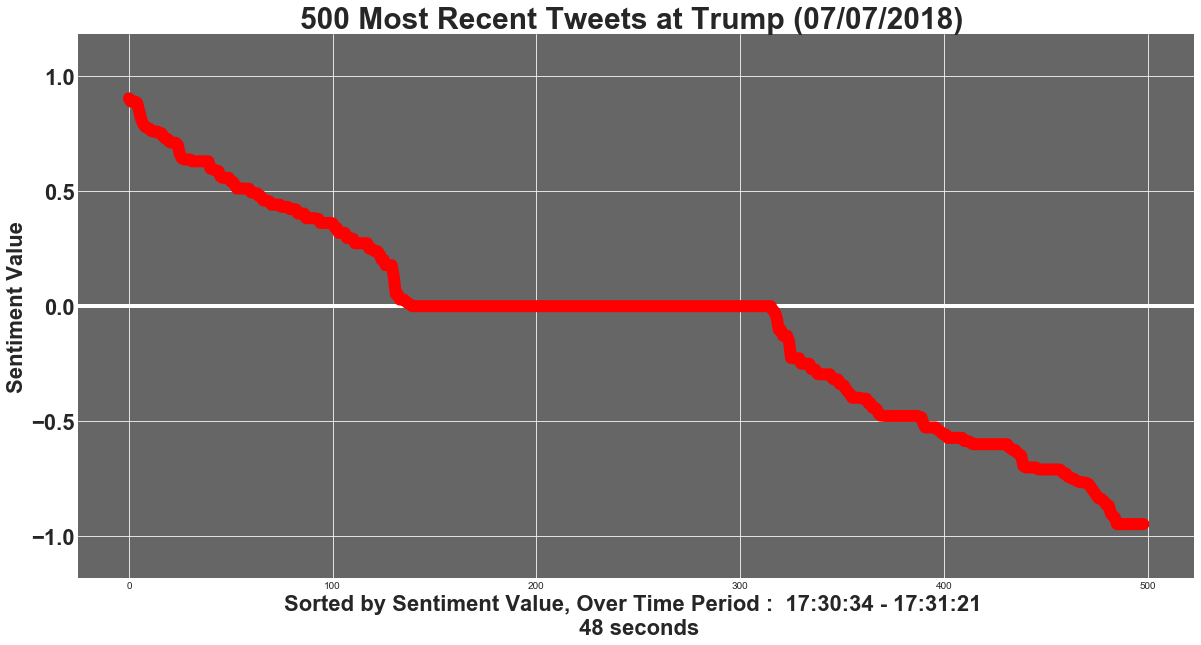

In [27]:
# Date Handling from  dataframe of all 500 - date/time order
trump_date1 = trump_df.created_at[0:1]
trump_date2 = trump_df.created_at[-1:]

#Works on dataframe all_tweet_df for plot, but uses trump_df for header data range
# Prepare and Display figure
sns.set_style("darkgrid", {"axes.facecolor": ".4"})
fig, ax = plt.subplots(figsize=(20, 10))
#plt.subplot(2,1,1)
x_axis = np.arange(len(all_tweet_df))
tick_locations = [value+1 for value in x_axis]
ax.set_ylim(-1.18, 1.18)
plt.axhline(linewidth=4, color='w')
y_axis = all_tweet_df['comp']
plt.plot(x_axis,y_axis, linewidth=12, color='r')
plt.title("500 Most Recent Tweets at Trump (07/07/2018) ", size=30,fontweight='semibold')
plt.xlabel('Sorted by Sentiment Value, Over Time Period :  17:30:34 - 17:31:21 \n 48 seconds', size=22,fontweight='semibold')
plt.ylabel('Sentiment Value', size=22,fontweight='semibold')
plt.setp(ax.get_yticklabels(), size=22,fontweight='semibold')
print()
print()
plt.show()
print()
print()

# Figure 2:    Sample of 20 Most Recent Tweets, Sort by Compound Sentiment

#      With photos

In [28]:
# OPTIONS
# Select 20 (default for graph details) most recent tweeters or change twt
twt = 25



Missing: http://pbs.twimg.com/profile_images/872617255900594176/b_woIjzV_normal.jpg


Missing: http://pbs.twimg.com/profile_images/965569925573152768/4MwCUDfo_normal.jpg


Missing: http://pbs.twimg.com/profile_images/1013105116822503424/d8XWqZ0w_normal.jpg


Missing: http://pbs.twimg.com/profile_images/1013737333378699264/5Ax1kQLh_normal.jpg


Missing: http://pbs.twimg.com/profile_images/2635226138/867ea2ca617e8c5d7a18c2a1c25b479f_normal.jpeg


Missing: http://pbs.twimg.com/profile_images/2890266838/4c91b22c7c6d936c04482e1321901380_normal.jpeg


Missing: http://pbs.twimg.com/profile_images/1010350814102253568/bwTz9ttu_normal.jpg


Missing: http://pbs.twimg.com/profile_images/997619076196429825/qL18NKhY_normal.jpg


Missing: http://pbs.twimg.com/profile_images/992176176662708229/NCh0_r5c_normal.jpg


Missing: http://pbs.twimg.com/profile_images/986800221664563201/peBpszr8_normal.jpg


Missing: http://pbs.twimg.com/profile_images/1003643392079876096/imleDDTq_normal.jpg


Missing: http:

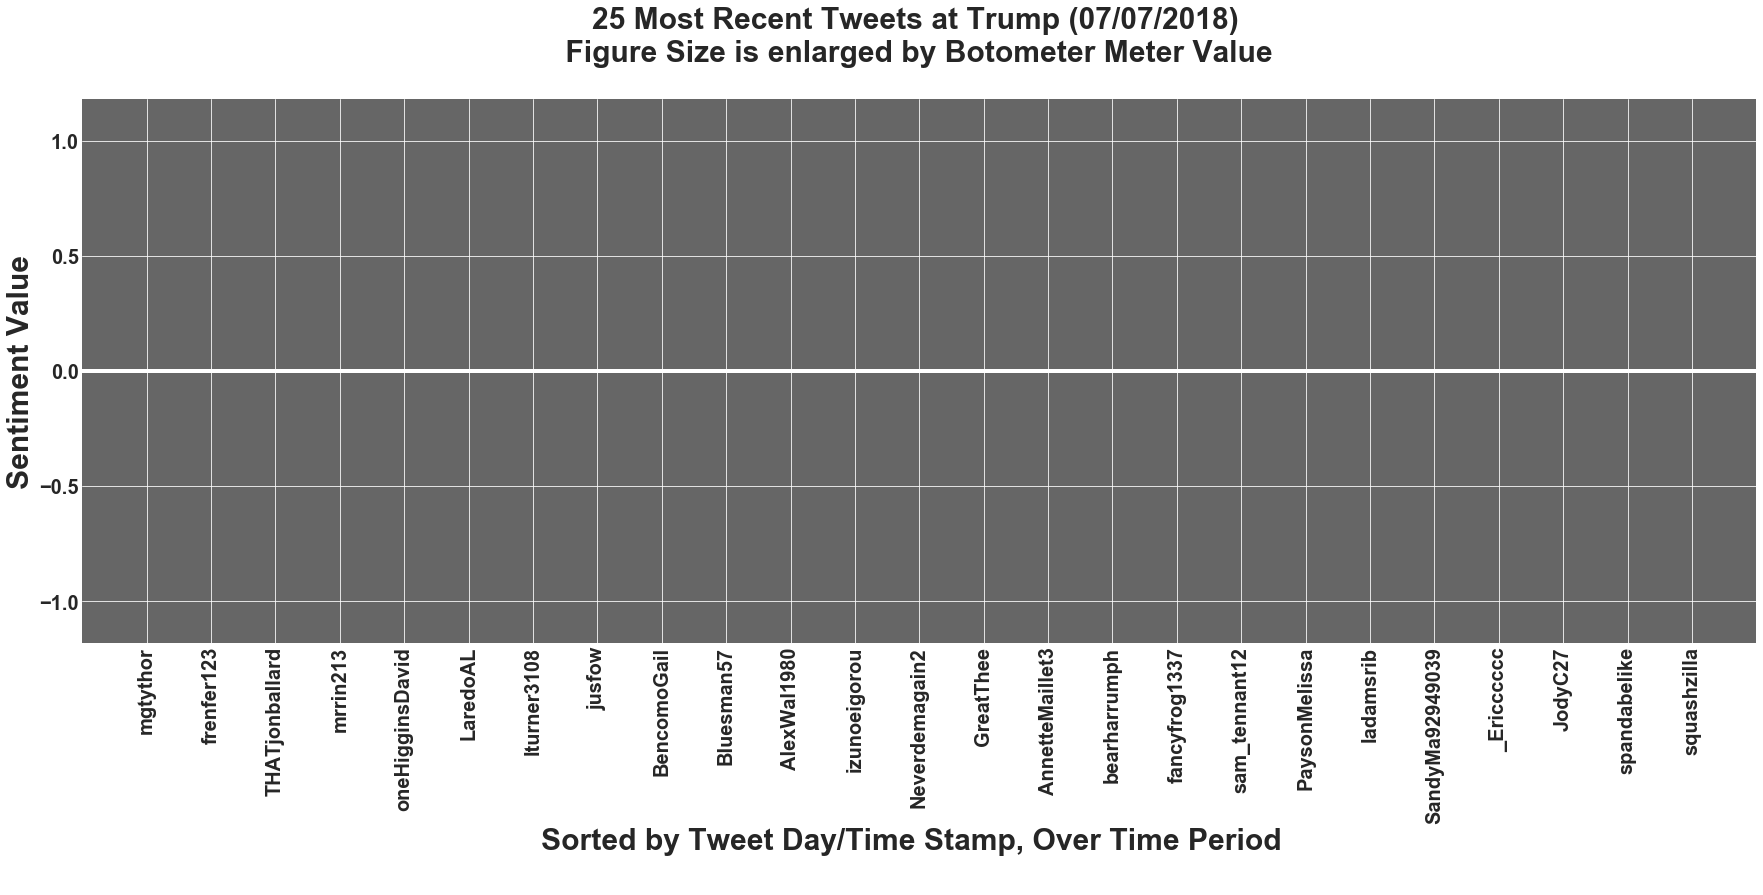


0   2018-07-07 17:31:21
Name: created_at, dtype: datetime64[ns]
24   2018-07-07 17:31:19
Name: created_at, dtype: datetime64[ns]


In [29]:
# Selected data from main trump_df
fig2_df = trump_df.head(twt)
#Date Handling before sort
trump_date1 = fig2_df.created_at[0:1]
trump_date2 = fig2_df.created_at[-1:]
# Sort by comp
fig2_df = fig2_df.sort_values(by="comp", ascending=False)
fig2_df = fig2_df.reset_index()
# I'LL BE SHOWING TWO PLOTS, ONE OVER THE OTHER TO SHOW ONE WITH 'BOTS' AND ONE WITHOUT 'BOTS'
donothing = ""
sns.set_style("darkgrid", {"axes.facecolor": ".4"})
fig, ax = plt.subplots(figsize=(30, 10))
#plt.subplot(2,1,1)

for index, row in fig2_df.iterrows():
    try:
        url_item =row['profile_url']
        response = requests.get(url_item)
        img_url = Image.open(BytesIO(response.content))
        zoom = row['meter'] *1
        imagebox = OffsetImage(img_url, zoom=zoom)
        y = row['comp']
        xy = [index+1,y]
        ab = AnnotationBbox(imagebox, xy,                    
                        xycoords='data',
                        frameon=True,
                        pad=0.6    
                        )                               
        ax.add_artist(ab)       
    except:
        print()
        print()
        print(f"Missing: {url_item}")
        # Replace this code with default photo

x_axis = np.arange(len(fig2_df)+1)
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations,fig2_df['user_screen_name'],rotation='vertical',size=20,fontweight='semibold')
ax.set_ylim(-1.18, 1.18)
plt.axhline(linewidth=4, color='w')
plt.title(str(twt) + " Most Recent Tweets at Trump (07/07/2018) \n Figure Size is enlarged by Botometer Meter Value \n", size=30,fontweight='semibold')
plt.xlabel('Sorted by Tweet Day/Time Stamp, Over Time Period  \n', size=30,fontweight='semibold')
plt.ylabel('Sentiment Value', size=30,fontweight='semibold')
plt.setp(ax.get_yticklabels(), fontsize=20, fontweight='semibold')
print()
print()
plt.show()
#print(f"Time Period : {trump_date1}  to  {trump_date2}")
print()
print(trump_date1)
print(trump_date2)

THIS GRAPH TAKES UP TO 20-30 seconds to get data to print!!  JUST WAIT when the number of TWEETERS is big

# Figure 3 :  Most Recent 200 Tweeters - front_trump_df

In [30]:
# OPTION Warning = graph size may need to be adjusted
# To change the diplayed number of tweeters, change twt = num*1
twt = 500

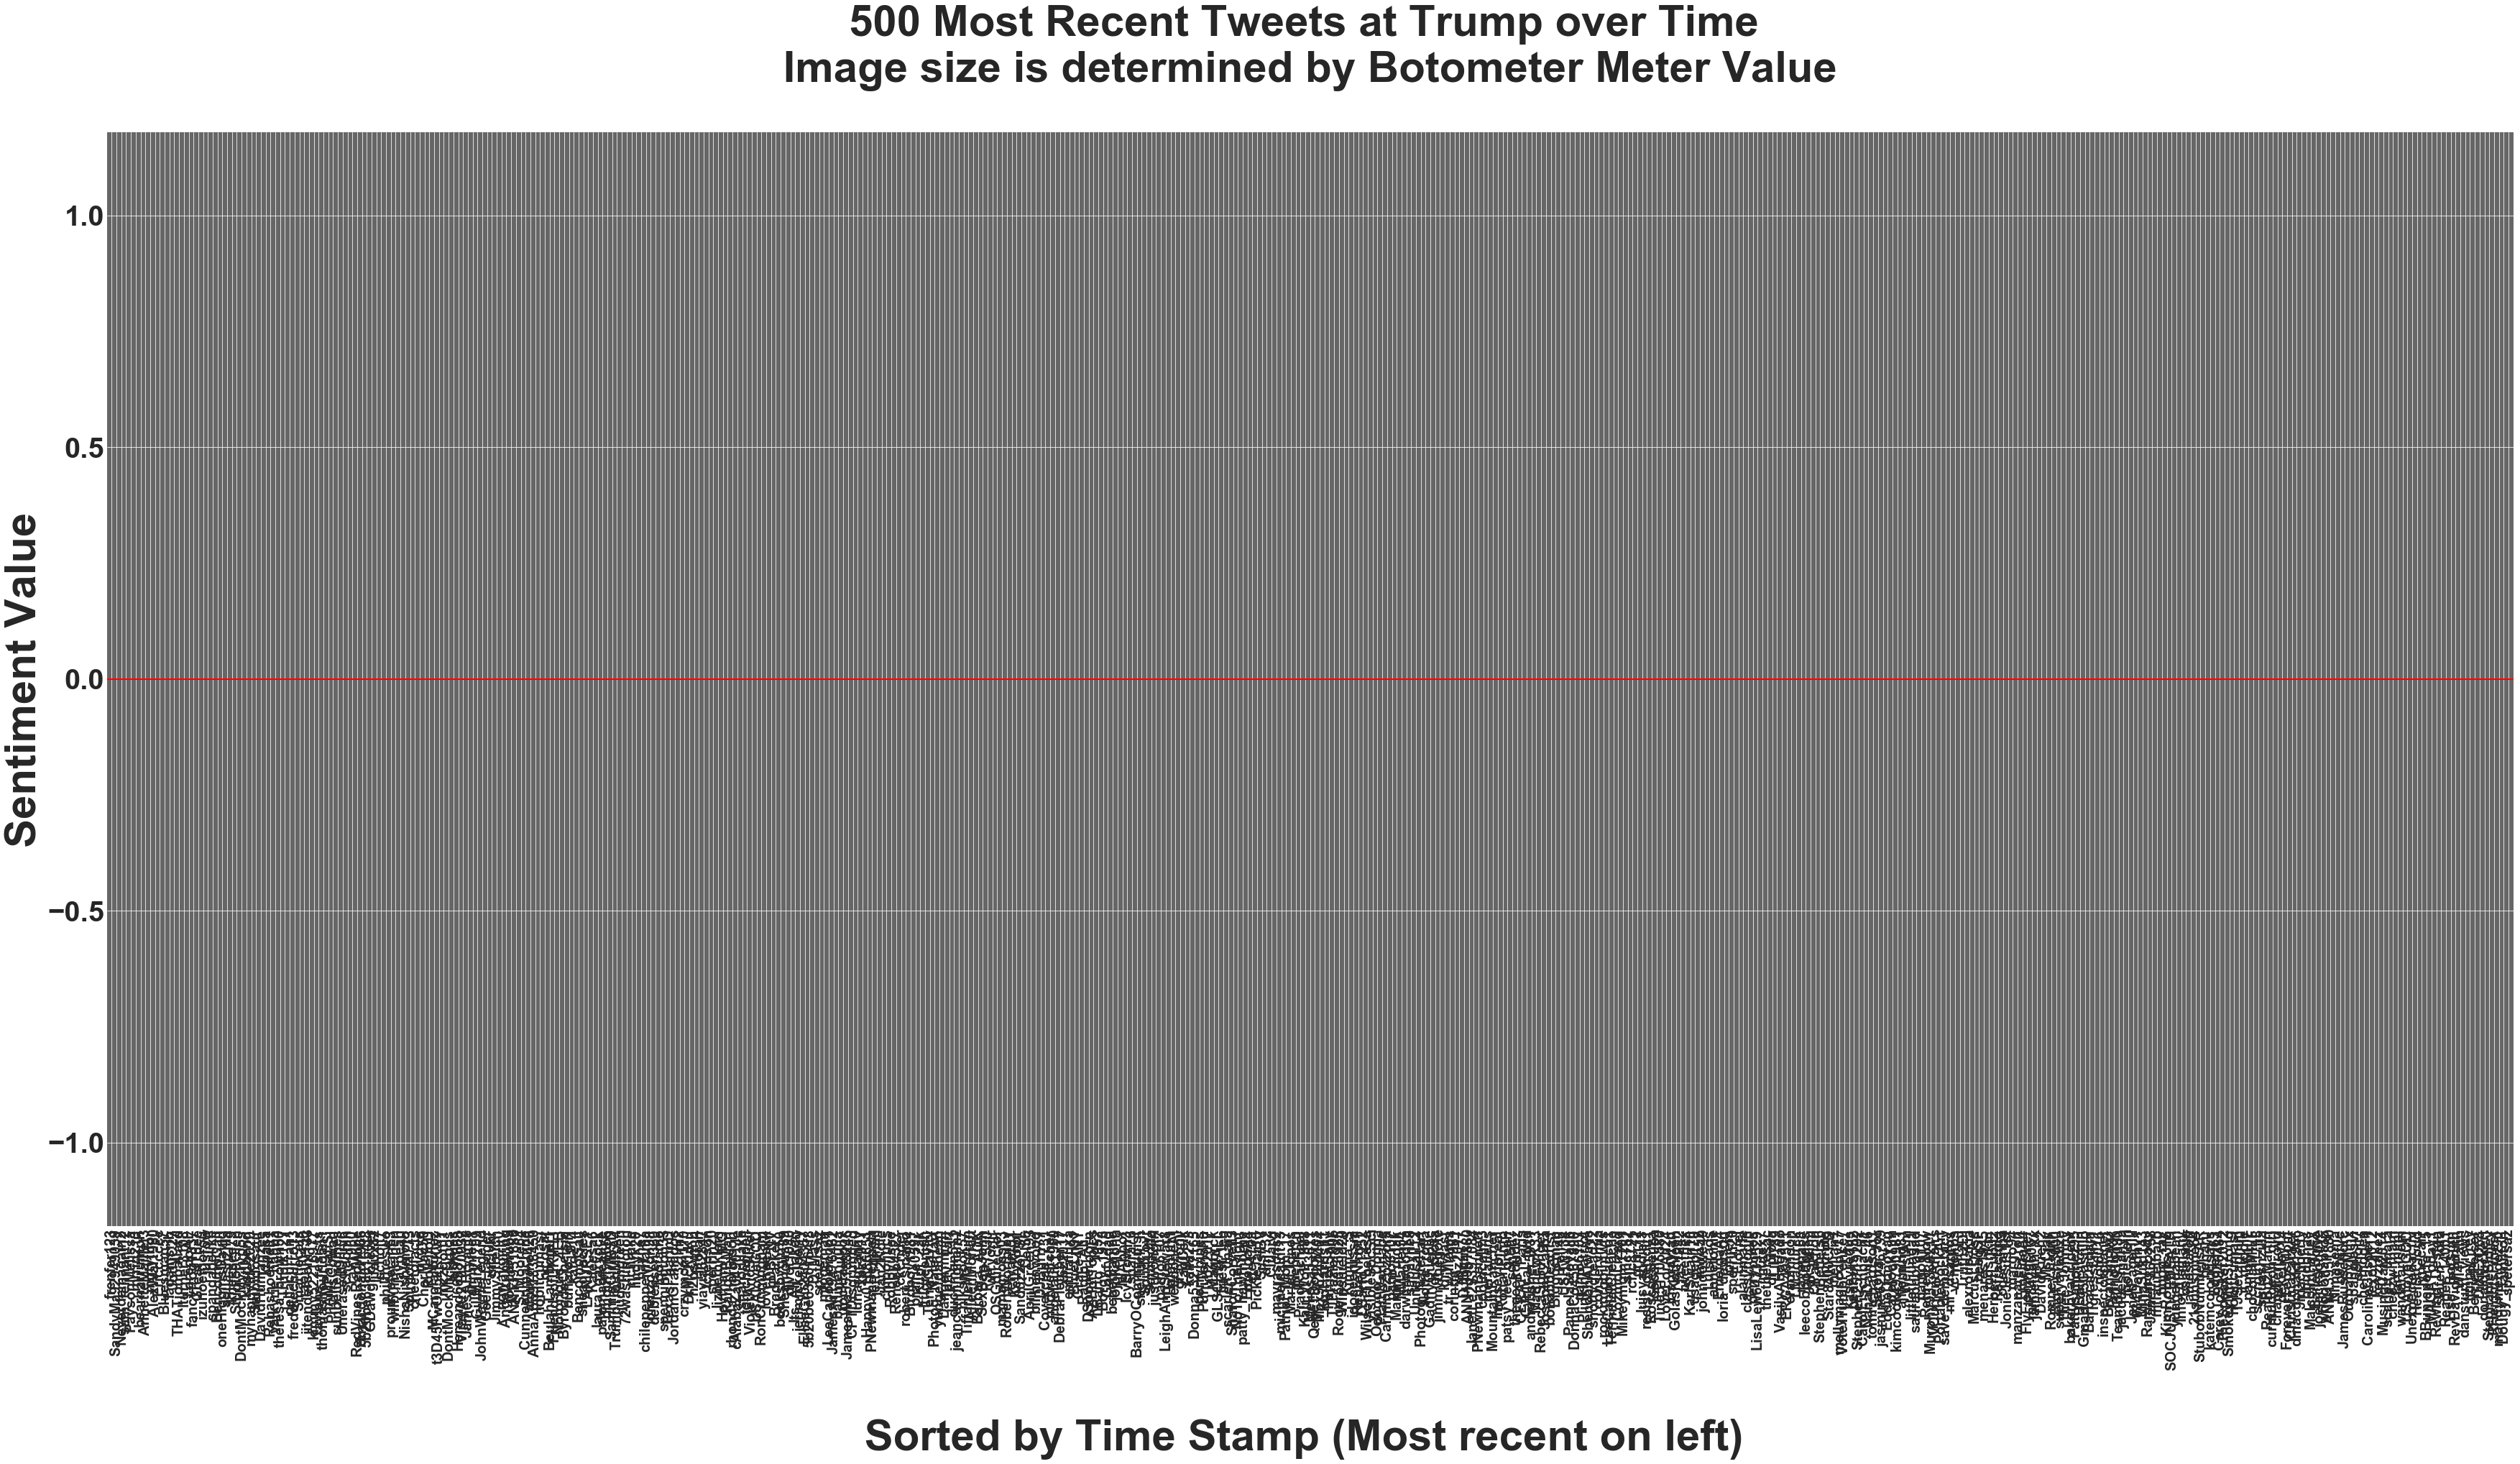

0   2018-07-07 17:31:21
Name: created_at, dtype: datetime64[ns]
498   2018-07-07 17:30:34
Name: created_at, dtype: datetime64[ns]


In [31]:
# Dataframe used is 200 Most Recent Tweets 
front_trump_df = trump_df.head(twt)
# Date handling
trump_date1 = front_trump_df.created_at[0:1]
trump_date2 = front_trump_df.created_at[-1:]

# Preapare and display figure
sns.set_style("darkgrid", {"axes.facecolor": ".4"})
fig, ax = plt.subplots(figsize=(60, 28))

for index, row in front_trump_df.iterrows():
    try:
        url_item =row['profile_url']       
        response = requests.get(url_item)
        img_url = Image.open(BytesIO(response.content))
        zoom = row['meter'] *.9
        imagebox = OffsetImage(img_url, zoom=zoom)
        y = row['comp']        
        xy = [index+1,y]
        ab = AnnotationBbox(imagebox, xy,                    
                        xycoords='data',
                        frameon=True,
                        pad=0.5
                        )                               
        ax.add_artist(ab)       
    except:
        donothing = ""
       
x_axis = np.arange(len(front_trump_df)+1)
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations,front_trump_df['user_screen_name'],rotation='vertical',size=20,fontweight='semibold')
ax.set_ylim(-1.18, 1.18)
plt.axhline(linewidth=2, color='r')
plt.title(str(twt) +  " Most Recent Tweets at Trump over Time \n Image size is determined by Botometer Meter Value \n", size=60,fontweight='semibold')
plt.xlabel('\n Sorted by Time Stamp (Most recent on left)  ', size= 60,fontweight='semibold')
plt.ylabel('Sentiment Value', size=60,fontweight='semibold')
plt.setp(ax.get_yticklabels(), fontsize=40, fontweight='semibold')
print()
print()
plt.show()
print(trump_date1)
print(trump_date2)

# Figure 4  :  Select cutoff=3 on the Botometer Meter from Recent 200 Tweets

In [ ]:
# OPTIONS TO RUN
cutoff = 4

cut = str(cutoff)
# Missing profile photos
suppress_print = "yes"
# Print user & data if found for graph
print_found = "yes"
# Supress printing of skipped records not in range
suppress_skip = "yes"
# Print results
suppress_results = "no"

In [ ]:
# Date handling - uses front_trump_df
trump_date1 = front_trump_df.created_at[0:1]
trump_date2 = front_trump_df.created_at[-1:]

# Prepare and display figure
sns.set_style("darkgrid", {"axes.facecolor": ".4"})
fig, ax = plt.subplots(figsize=(30, 12))
bots_found = []
missing_prof = []
tick = 1*1
#plot photos as found from requirements
for index, row in front_trump_df.iterrows():
    if row['meter'] >= cutoff:
        try:
            url_item =row['profile_url']
            response = requests.get(url_item)
            img_url = Image.open(BytesIO(response.content))
            zoom = row['meter'] *.9
            imagebox = OffsetImage(img_url, zoom=zoom)
            y = row['comp']
            xy = [tick,y]
            ab = AnnotationBbox(imagebox, xy,                    
                            xycoords='data',
                            frameon=True,
                            pad=0.5
                            )                               
            ax.add_artist(ab)
            bots_found.append(row['user_screen_name'])            
            tick += 1
            if print_found == "yes":
                rating = "{0:.2f}".format(row['cap']*100)
                print(f"Tweet likely from BOT found: {row['user_screen_name']}        has the CAP rating of      {rating}")
            else:
                donothing = ""
        except:
            if suppress_print == "no":
                print(f"Missing: {row['profile_url']}")
            else:
                missing_prof.append(row['user_screen_name'])   
    else:
        if suppress_skip == "no":
            print(f"Skipping meter values of Tweet Users less than {cutoff}:  " ,float(row['cap']*100)," ", row['user_screen_name'])
        else:
            donothing = ""
print()            
x_axis = np.arange(len(bots_found)+1)
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations,bots_found,rotation='vertical',size=20,fontweight='semibold')
ax.set_ylim(-1.18, 1.18)
plt.axhline(linewidth=2, color='r')
ax.set_title(f"From {str(twt)} Most Recent Tweets at Trump \n Botometer finding based on a minimum Meter value of {cut} out of 5", size=35,fontweight='semibold')
plt.ylabel('Sentiment Value', size=30,fontweight='semibold')
plt.xlabel('\n Sorted by Date/Time Stamp \n Image size is determined by Botometer Value ', size= 30,fontweight='semibold')
plt.setp(ax.get_yticklabels(), fontsize=20, fontweight='semibold')
print()
print()
plt.show()
if suppress_results == "no":
    print(f'RESULTS:  There were {len(bots_found)} Tweets found in this range on the Botometer findings.')
else:
    donothing = ""
print(f"          Your selected threshold for including BOTS is : {cutoff} or greater.")
print()
print(trump_date1)
print(trump_date2)

# Figure 5 : RESULTS using  CAP value - % likely a Complete Automated BOT

In [ ]:
# OPTIONS TO RUN
cutoff = 51

suppress_print = "yes"
print_found = "yes"
suppress_skip = "yes"
suppress_results = "no"

In [ ]:
# Date handling - uses front_trump_df
trump_date1 = front_trump_df.created_at[0:1]
trump_date2 = front_trump_df.created_at[-1:]

# Prepare and display figure
sns.set_style("darkgrid", {"axes.facecolor": ".4"})
fig, ax = plt.subplots(figsize=(40, 15))

missing_prof = []
bots_found = []
tick = 1*1
donothing = ""
#plot photos as found from requirements
for index, row in front_trump_df.iterrows():
    if row['cap']*100 >= cutoff:
        try:
            url_item =row['profile_url']
            response = requests.get(url_item)
            img_url = Image.open(BytesIO(response.content))
            zoom = row['meter'] *.9
            imagebox = OffsetImage(img_url, zoom=zoom)
            y = row['comp']
            xy = [tick,y]
            ab = AnnotationBbox(imagebox, xy,                    
                            xycoords='data',
                            frameon=True,
                            pad=0.5
                            )                               
            ax.add_artist(ab)
            bots_found.append(row['user_screen_name'])
            tick += 1
            if print_found == "yes":
                rating = "{0:.2f}".format(row['cap']*100)
                print(f"Tweet likely from BOT found: {row['user_screen_name']}        has the CAP rating of      {rating}")
            else:
                donothing = ""                             
        except:
            if suppress_print == "no":
                print(f"Missing: {row['profile_url']}")
            else:
                missing_prof.append(row['user_screen_name'])
    else:
        if suppress_skip == "no":
            print(f"Skipping meter values of Tweet Users less than {cutoff}:  " ,float(row['cap']*100)," ", row['user_screen_name'])
        else:
            donothing = ""
print()       
x_axis = np.arange(len(bots_found)+1)
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations,bots_found,rotation='vertical',size=30,fontweight='semibold')
ax.set_ylim(-1.18, 1.18)
plt.axhline(linewidth=2, color='r')
plt.title(str(twt) +  f" Most Recent Tweets at Trump \n Using CAP Value {cutoff}% from Botometer \n", size=50,fontweight='semibold')
plt.xlabel('\n Image size is determined by Meter Value', size= 50,fontweight='semibold')
plt.ylabel('Sentiment Value', size=50,fontweight='semibold')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show()
if suppress_results == "no":
    print(f'RESULTS:  There were {len(bots_found)} Tweets found in this range on the Botometer findings.')
else:
    donothing = ""
print(f"          Your selected threshold for including BOTS is : {cutoff} or greater.")  


## Observations
* The Vader Sentiment tool compound sentiment number can be misleading when looking at the average of compound values. When combining the average compound score with a scatter plot view of the sentiment, it is much easier to deduce the overall distribution of tweet sentiment.
* Though many fluctuations occur, the top ten trending accounts overall attract a positive sentiment at any given time, readily outpacing negative sentiment.
* Wordcloud
    * Word cloud is a graphical representation of frequently used words within text. The height (size) of each word in this picture is an indication of frequency of occurrence of the word in the entire text. 
    * Word cloud can be a used as tool to help analyze unstructured data. To be able to count the frequency of data STOPWORDS is required to eliminate commonly occurring words.
* Data cleanup (removing characters, HTTPS, RT’s) is required to see word clouds that are of value. Word cloud analysis to some extent is less precise for text with 240 characters or less.
* Language
    * There are some common challenges of sentiment analysis such as emoji analysis, word order, spelling and certain words that may have a different or opposite meaning in certain situations. After observation is was clear that the sentiment analyzer is not accurate for multi-language text. No values recorded for Russian as an example. English text (without multi language) appeared to be more accurate.